# Imersão de Dados 04 - Pesquisa de Imóveis em São Paulo

# Aula 03

# Tabela de Conteúdos
1. Definição do Problema
2. Definição da Baseline
3. Planejamento da Solução
4. Coleta e Limpeza dos Dados
5. Análise Exploratória dos Dados

# 1) Definição do Problema

### 1.1) Problema de Negócio
Nós possuimos duas bases de dados não tratados, uma primária que se trata de dados referentes a imóveis da cidade de São Paulo, e um segundo dataset que consta de dados básicos retirados do IBGE relacionados ao último CENSU realizado em 2010. Nosso objetibo com estes dados é realizar uma análise completa e extrair insights interessantes relacionando o primeiro dataset sobre imóveis, com os dados provindos do segundo dataset, que dentre outras coisas, nos trás informações sobre imóveis em diversos estados e o valor do rendimento mensal da família responsável pelo respectivo imóvel.

>#### DESAFIOS:
>- Tratar os outliers e comparar com os resultados.
>- Agrupar por mais de uma categoria e realizar as análises.
>- Organize o colab para deixar com cara de projeto.

# 3) Planejamento da Solução
### 3.1) Produto Final
Notebook contendo uma análise exploratória de dados que vincule os dados do dataset de imóveis em São Paulo com os dados do dataset IBGE, e realize sobre ele um tratamento contra outliers, valores duplicados e faça a tranfosmação apropriada nas colunas. Além disso, ter gerado análises com os dados agrupados por mais de uma categoria e ter todo o notebook no formato de projeto.
- Arquivos com estrutura de projeto
- Análises em um notebook, arquivo com extensão .ipynb
### 3.2) Tech Stack
- Python, Pandas e Numpy
- Matplotlib e Seaborn
- Jupyter Notebook e VSCode
### 3.3) Processo:
- Tratar os outliers e comparar com os resultados.
    1. 
- Agrupar por mais de uma categoria e realizar as análises.
- Organize o colab para deixar com cara de projeto.

# Coleta e Limpeza dos Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from scipy import stats

sns.set()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 500)

In [2]:
dados_vendas_censo = pd.read_csv( '../assets/dados_vendas_censo.csv' )
dados_vendas_censo.dropna( how='all', axis=1, inplace=True )
dados_vendas_censo.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Valor_mm,Valor_m2,rua,cep,latitude,longitude,Point,setor_censo,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,Nome_da_RM,Cod_municipio,Nome_do_municipio,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Nome_do_subdistrito,Cod_bairro,Nome_do_bairro,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.00,7.00,7000.00,Avenida Itacira,4061000.00,-23.62,-46.65,POINT (-46.6481622 -23.6157934),355030877000067.00,355030877000067.00,3.00,Regiï¿½o Sudeste,35.00,Sï¿½o Paulo,3515.00,Metropolitana de Sï¿½o Paulo,35061.00,Sï¿½o Paulo,20.00,RM Sï¿½o Paulo,3550308.00,Sï¿½O PAULO,355030877.00,SAï¿½DE,35503087700.00,SAï¿½DE,3550308000.00,Sï¿½O PAULO (todos os setores),1.00,0.00,164.00,437.00,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.00,3.70,7459.68,Rua Aurelia Perez Alvarez,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023.00,355030871000023.00,3.00,Regiï¿½o Sudeste,35.00,Sï¿½o Paulo,3515.00,Metropolitana de Sï¿½o Paulo,35061.00,Sï¿½o Paulo,20.00,RM Sï¿½o Paulo,3550308.00,Sï¿½O PAULO,355030871.00,SANTO AMARO,35503087100.00,SANTO AMARO,3550308000.00,Sï¿½O PAULO (todos os setores),1.00,0.00,136.00,425.00,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.00,0.38,3040.00,Rua Alba Valdez,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050.00,355030830000050.00,3.00,Regiï¿½o Sudeste,35.00,Sï¿½o Paulo,3515.00,Metropolitana de Sï¿½o Paulo,35061.00,Sï¿½o Paulo,20.00,RM Sï¿½o Paulo,3550308.00,Sï¿½O PAULO,355030830.00,GRAJAï¿½,35503083000.00,GRAJAï¿½,3550308000.00,Sï¿½O PAULO (todos os setores),1.00,0.00,142.00,493.00,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.00,0.54,5400.00,Rua Tobias Barreto,3176000.00,-23.55,-46.59,POINT (-46.5881729 -23.5499597),355030808000050.00,355030808000050.00,3.00,Regiï¿½o Sudeste,35.00,Sï¿½o Paulo,3515.00,Metropolitana de Sï¿½o Paulo,35061.00,Sï¿½o Paulo,20.00,RM Sï¿½o Paulo,3550308.00,Sï¿½O PAULO,355030808.00,BELï¿½M,35503080800.00,BELï¿½M,3550308000.00,Sï¿½O PAULO (todos os setores),1.00,0.00,156.00,468.00,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.00,1.98,4500.00,Rua Graham Bell,4737030.00,-23.59,-46.76,POINT (-46.7600773 -23.5937964),355030865000169.00,355030865000169.00,3.00,Regiï¿½o Sudeste,35.00,Sï¿½o Paulo,3515.00,Metropolitana de Sï¿½o Paulo,35061.00,Sï¿½o Paulo,20.00,RM Sï¿½o Paulo,3550308.00,Sï¿½O PAULO,355030865.00,RAPOSO TAVARES,35503086500.00,RAPOSO TAVARES,3550308000.00,Sï¿½O PAULO (todos os setores),1.00,0.00,107.00,376.00,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46


### Limpando os dados

Por questão de tempo, vou utilizar apenas o método do John Tukey de detecção de outliers que considera como outliers, dados que estejam cerca de 3 vezees o valor do IQR para cima ou para baixo.

In [3]:
# Checando por valores nulos
soma_nulos = dados_vendas_censo.isna().sum()
soma_nulos[soma_nulos > 0]

Bairro                     8
setor_censo              285
Cod_setor                289
Cod_Grandes Regiï¿½es    289
Nome_Grande_Regiao       289
Cod_UF                   289
Nome_da_UF               289
Cod_meso                 289
Nome_da_meso             289
Cod_micro                289
Nome_da_micro            289
Cod_RM                   289
Nome_da_RM               289
Cod_municipio            289
Nome_do_municipio        289
Cod_distrito             289
Nome_do_distrito         289
Cod_subdistrito          289
Nome_do_subdistrito      289
Cod_bairro               289
Nome_do_bairro           289
Situacao_setor           289
Tipo_setor               289
V001                     289
V002                     289
V003                     289
V004                     289
V005                     289
V006                     289
V007                     289
V008                     289
V009                     289
V010                     289
V011                     289
V012          

In [4]:
dados_vendas_censo.dropna( subset='setor_censo', axis='rows', inplace=True )

In [5]:
dados_vendas_censo.isna().sum()

Rua                      0
Bairro                   8
Cidade                   0
Metragem                 0
Quartos                  0
Banheiros                0
Vagas                    0
Valor                    0
Valor_anuncio            0
Valor_mm                 0
Valor_m2                 0
rua                      0
cep                      0
latitude                 0
longitude                0
Point                    0
setor_censo              0
Cod_setor                4
Cod_Grandes Regiï¿½es    4
Nome_Grande_Regiao       4
Cod_UF                   4
Nome_da_UF               4
Cod_meso                 4
Nome_da_meso             4
Cod_micro                4
Nome_da_micro            4
Cod_RM                   4
Nome_da_RM               4
Cod_municipio            4
Nome_do_municipio        4
Cod_distrito             4
Nome_do_distrito         4
Cod_subdistrito          4
Nome_do_subdistrito      4
Cod_bairro               4
Nome_do_bairro           4
Situacao_setor           4
T

In [6]:
# Checando por duplicatas
dados_vendas_censo.duplicated().sum()

0

### Tratando outliers

In [7]:
dados_vendas_censo_tratado = dados_vendas_censo.copy()
dados_vendas_censo_tratado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 0 to 5604
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rua                    5320 non-null   object 
 1   Bairro                 5312 non-null   object 
 2   Cidade                 5320 non-null   object 
 3   Metragem               5320 non-null   int64  
 4   Quartos                5320 non-null   int64  
 5   Banheiros              5320 non-null   int64  
 6   Vagas                  5320 non-null   int64  
 7   Valor                  5320 non-null   object 
 8   Valor_anuncio          5320 non-null   float64
 9   Valor_mm               5320 non-null   float64
 10  Valor_m2               5320 non-null   float64
 11  rua                    5320 non-null   object 
 12  cep                    5320 non-null   float64
 13  latitude               5320 non-null   float64
 14  longitude              5320 non-null   float64
 15  Poin

In [8]:
# Separando variáveis em numéricas e categóricas
dados_vendas_censo_tratado.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [9]:
dados_vendas_numericos, dados_vendas_categoricos = dados_vendas_censo_tratado \
    .select_dtypes( include=['int64', 'float64'] ), dados_vendas_censo_tratado \
        .select_dtypes( exclude=['int64', 'float64'] )

Nota-se que existem valores bem discrepantes nas colunas Metragem, Valor_anuncio, Valor_mm, **Valor_m2**, e todas as colunas V.

In [10]:
dados_vendas_categoricos.describe()

,Rua,Bairro,Cidade,Valor,rua,Point,Nome_Grande_Regiao,Nome_da_UF,Nome_da_meso,Nome_da_micro,Nome_da_RM,Nome_do_municipio,Nome_do_distrito,Nome_do_subdistrito,Nome_do_bairro
count,5320,5312,5320,5320,5320,5320,5316,5316,5316,5316,5316,5316,5316,5316,5316
unique,2764,578,1,749,2321,2310,1,1,1,1,1,1,92,92,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,R$ 2.500.000,Rua Alberto Faria,POINT (-46.7096341 -23.5502764),Regiï¿½o Sudeste,Sï¿½o Paulo,Metropolitana de Sï¿½o Paulo,Sï¿½o Paulo,RM Sï¿½o Paulo,Sï¿½O PAULO,MORUMBI,MORUMBI,Sï¿½O PAULO (todos os setores)
freq,22,193,5320,113,27,27,5316,5316,5316,5316,5316,5316,530,530,5316


In [11]:
# Imprimindo estatísticas de resumo
dados_vendas_numericos.describe().round(2)

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,cep,latitude,longitude,setor_censo,Cod_setor,Cod_Grandes Regiï¿½es,Cod_UF,Cod_meso,Cod_micro,Cod_RM,Cod_municipio,Cod_distrito,Cod_subdistrito,Cod_bairro,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
count,5320.00,5320.00,5320.00,5320.00,5320.00,5320.00,5320.00,5320.00,5320.00,5320.00,5320.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00,5316.00
mean,333.89,3.41,3.71,3.82,2718649.80,2.72,7635.98,4184315.98,-23.58,-46.66,355030848057407.06,355030848069301.19,3.00,35.00,3515.00,35061.00,20.00,3550308.00,355030848.07,35503084806.92,3550308000.00,1.01,0.01,192.86,573.01,3.01,2.12,5859.24,190315010.55,6790.83,256857648.58,3247.50,109127681.78,4837.83,189910561.45
std,558.22,1.01,1.84,2.46,3552891.33,3.55,4735.30,1448621.53,0.05,0.06,27366723.36,27366464.82,0.00,0.00,0.00,0.00,0.00,0.00,27.37,2736.65,0.00,0.18,0.07,77.86,234.21,0.39,0.94,5107.95,933436369.49,5957.50,1761201586.50,2261.85,514376701.69,3637.45,1338262292.22
min,20.00,1.00,1.00,1.00,13000.00,0.01,65.00,1107060.00,-23.86,-46.80,355030801000008.00,355030801000008.00,3.00,35.00,3515.00,35061.00,20.00,3550308.00,355030801.00,35503080100.00,3550308000.00,1.00,0.00,12.00,29.00,1.61,0.70,174.91,98355.48,584.26,70021.07,91.16,106814.59,547.47,58440.21
25%,160.00,3.00,2.00,2.00,850000.00,0.85,4666.67,3436760.00,-23.61,-46.70,355030827000002.00,355030827000002.00,3.00,35.00,3515.00,35061.00,20.00,3550308.00,355030827.00,35503082700.00,3550308000.00,1.00,0.00,134.75,406.75,2.77,1.72,2437.72,7993781.82,2870.77,8187213.28,1605.57,5614213.08,2303.08,6241508.75
50%,255.00,3.00,3.00,3.00,1600000.00,1.60,6400.00,4544120.00,-23.58,-46.67,355030854000003.00,355030854000003.50,3.00,35.00,3515.00,35061.00,20.00,3550308.00,355030854.00,35503085400.00,3550308000.00,1.00,0.00,191.00,555.00,3.02,2.05,4385.96,26937466.70,5180.14,26955910.12,2788.53,18140427.35,4010.21,22218585.14
75%,410.00,4.00,5.00,5.00,3196985.00,3.20,9090.91,5436080.00,-23.55,-46.63,355030871000015.25,355030871000016.00,3.00,35.00,3515.00,35061.00,20.00,3550308.00,355030871.00,35503087100.00,3550308000.00,1.00,0.00,244.00,721.00,3.28,2.40,7600.23,95863644.54,8816.06,102000570.47,4291.69,56436140.20,6182.71,70195016.01
max,37000.00,11.00,14.00,38.00,65000000.00,65.00,54166.67,8473440.00,-23.43,-46.37,355030896000171.00,355030896000171.00,3.00,35.00,3515.00,35061.00,20.00,3550308.00,355030896.00,35503089600.00,3550308000.00,8.00,1.00,781.00,2488.00,5.21,32.90,41175.73,19436679037.42,50741.20,35468624352.67,20651.94,9521545092.67,40653.97,28642067613.82


# Análise Exploratória de Dados

## [DESAFIO 2] Tratar os outliers e comparar com os resultados.

In [12]:
# Agrupando variáveis numéricas com escalas semelhantes
grupo1 = ['Quartos', 'Banheiros', 'Vagas']
grupo2 = ['V001', 'V002']
grupo3 = ['V003', 'V004']
grupo4 = ['V005', 'V007', 'V009', 'V011']
grupo5 = ['V006', 'V008', 'V010', 'V012']

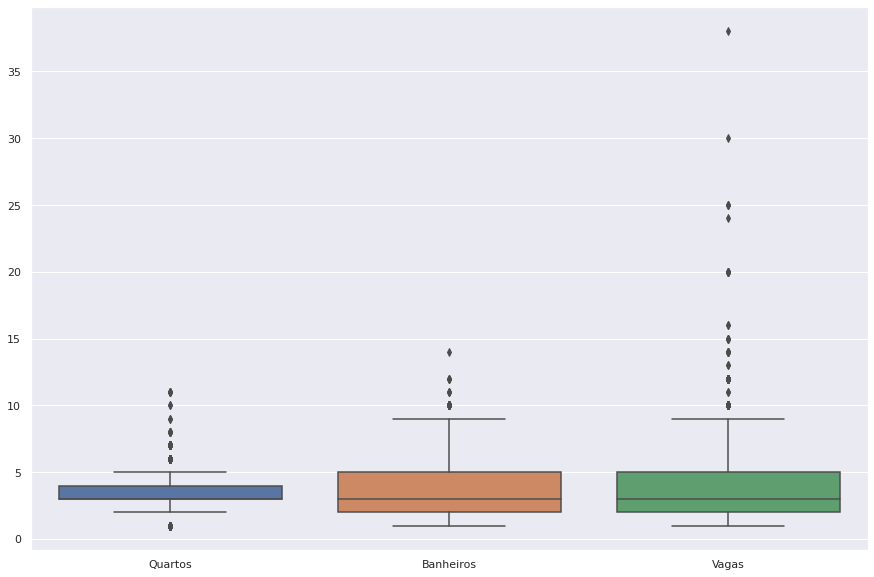

In [13]:
# Imprimindo box-plots de dados numéricos - Grupo 1
fig, ax = plt.subplots( figsize=(15, 10) )
ax = sns.boxplot( data=dados_vendas_numericos[grupo1] )

plt.show()

In [14]:
grupo1_outliers = dados_vendas_censo_tratado[((dados_vendas_censo_tratado['Quartos'] >= 6) | (dados_vendas_censo_tratado['Quartos'] < 2)) | \
    (dados_vendas_censo_tratado['Banheiros'] >= 10) | \
        (dados_vendas_censo_tratado['Vagas'] > 7)]
grupo1_outliers.shape

(609, 50)

In [15]:
# Removendo outliers do conjunto de variáveis numéricas do grupo1
dados_vendas_censo_tratado = dados_vendas_censo_tratado.drop( labels=grupo1_outliers.index )
dados_vendas_censo_tratado.shape

(4711, 50)

Comparando as distribuições das variáveis do `grupo1` antes e depois da exclusão dos outliers.

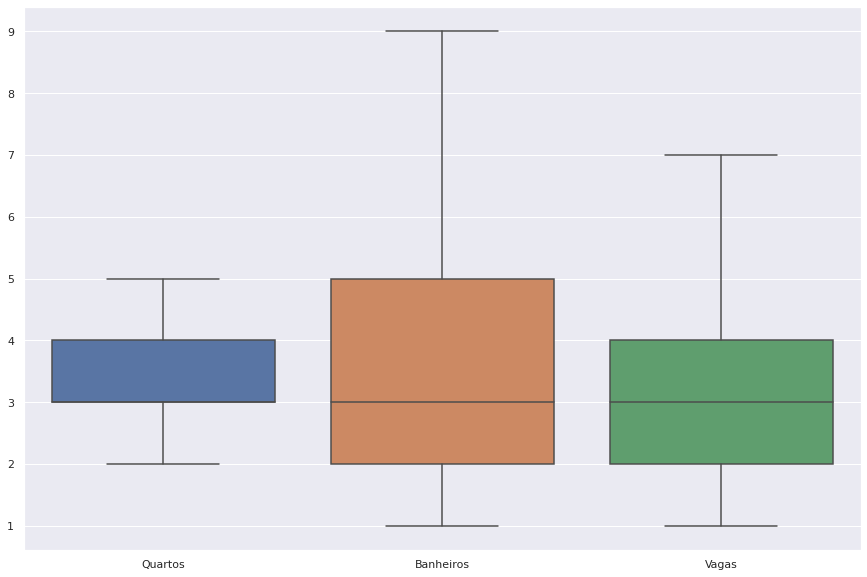

In [16]:
# Imprimindo box-plots de dados numéricos tratados - Grupo 1
fig, ax = plt.subplots( figsize=(15, 10) )
ax = sns.boxplot( data=dados_vendas_censo_tratado[grupo1] )

plt.show()

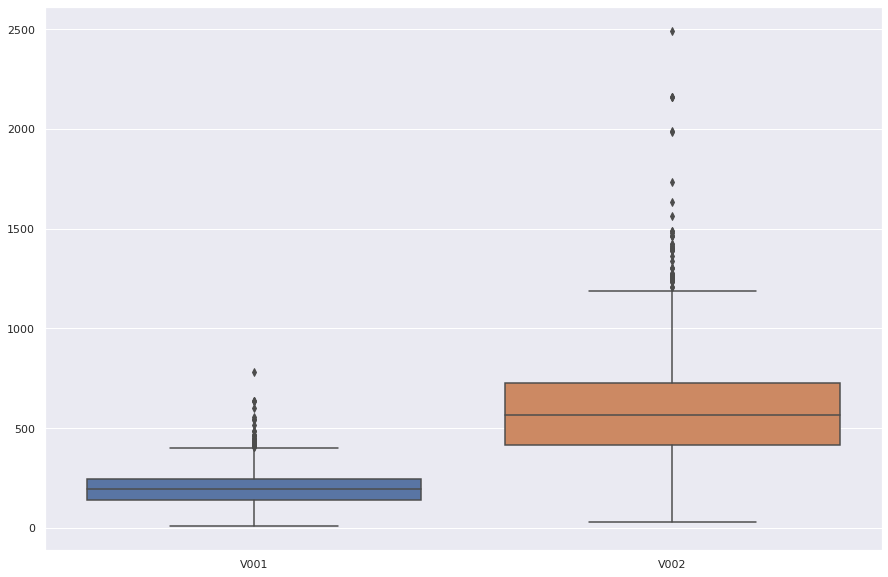

In [17]:
# Imprimindo box-plots de dados numéricos - Grupo 2
fig, ax = plt.subplots( figsize=(15, 10) )
ax = sns.boxplot( data=dados_vendas_censo_tratado[grupo2] )

plt.show()

In [18]:
grupo2_outliers = dados_vendas_censo_tratado[(dados_vendas_censo_tratado['V002'] >= 1180) | \
    (dados_vendas_censo_tratado['V001'] >= 400)]
grupo2_outliers.shape

(72, 50)

In [19]:
# Removendo outliers do conjunto de variáveis numéricas do grupo1
dados_vendas_censo_tratado = dados_vendas_censo_tratado.drop( labels=grupo2_outliers.index )
dados_vendas_censo_tratado.shape

(4639, 50)

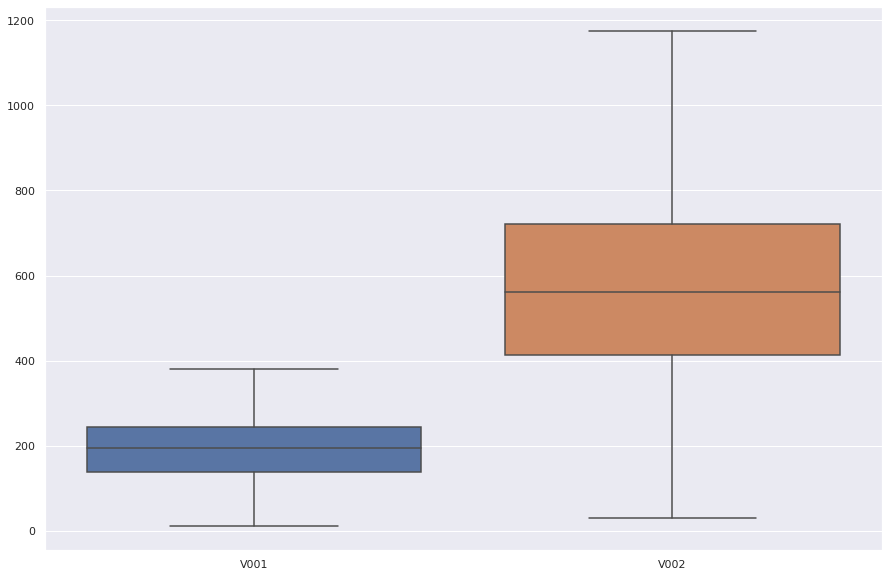

In [20]:
# Imprimindo box-plots de dados numéricos tratados - Grupo 2
fig, ax = plt.subplots( figsize=(15, 10) )
ax = sns.boxplot( data=dados_vendas_censo_tratado[grupo2] )

plt.show()

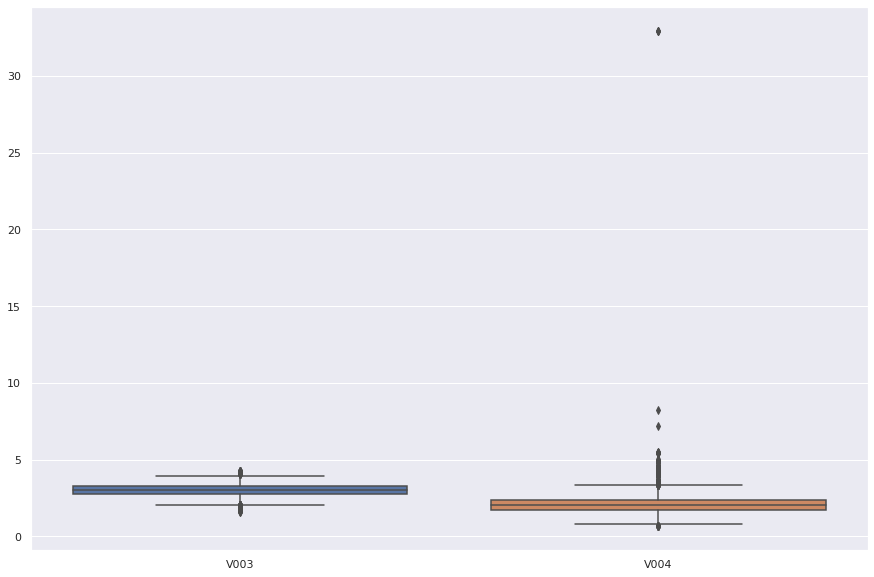

In [21]:
# Imprimindo box-plots de dados numéricos - Grupo 3
fig, ax = plt.subplots( figsize=(15, 10) )
ax = sns.boxplot( data=dados_vendas_censo_tratado[grupo3] )

plt.show()

In [22]:
grupo3_outliers = dados_vendas_censo_tratado[(dados_vendas_censo_tratado['V003'] > 4) | (dados_vendas_censo_tratado['V003'] <= 2) | \
        ((dados_vendas_censo_tratado['V004'] > 3.2) | (dados_vendas_censo_tratado['V004'] <= 0.5))]
grupo3_outliers.shape

(227, 50)

In [23]:
# Removendo outliers do conjunto de variáveis numéricas do grupo3
dados_vendas_censo_tratado = dados_vendas_censo_tratado.drop( labels=grupo3_outliers.index )
dados_vendas_censo_tratado.shape

(4412, 50)

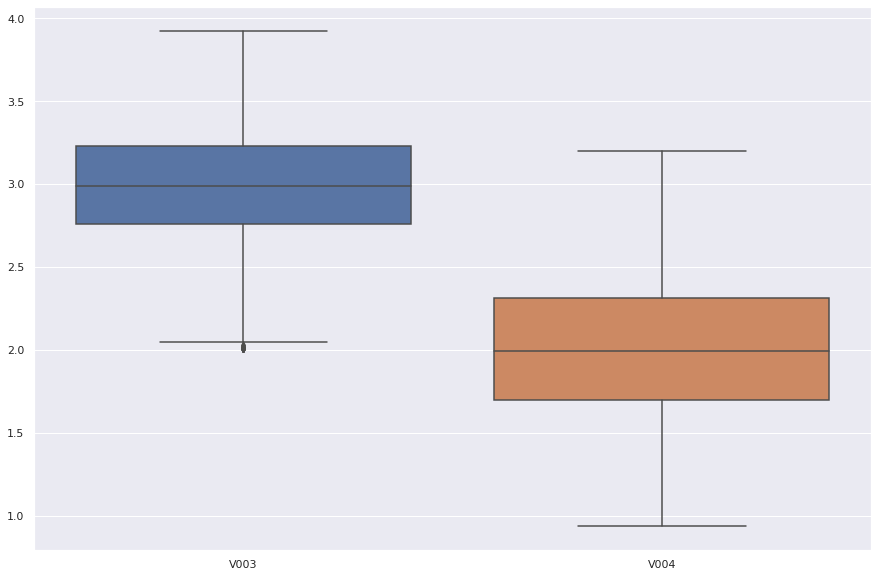

In [24]:
# Imprimindo box-plots de dados numéricos tratados - Grupo 3
fig, ax = plt.subplots( figsize=(15, 10) )
ax = sns.boxplot( data=dados_vendas_censo_tratado[grupo3] )

plt.show()

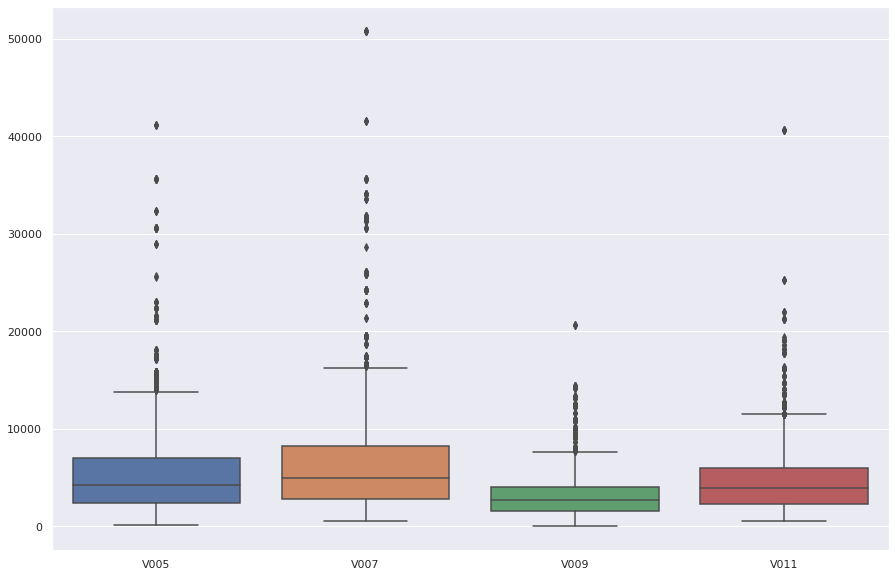

In [25]:
# Imprimindo box-plots de dados numéricos - Grupo 4
fig, ax = plt.subplots( figsize=(15, 10) )
ax = sns.boxplot( data=dados_vendas_censo_tratado[grupo4] )

plt.show()

In [26]:
grupo4_outliers = dados_vendas_censo_tratado[(dados_vendas_censo_tratado['V005'] >= 15000) | (dados_vendas_censo_tratado['V007'] >= 15000) | \
        ((dados_vendas_censo_tratado['V009'] >= 15000) | (dados_vendas_censo_tratado['V011'] >= 15000))]
grupo4_outliers.shape

(260, 50)

In [27]:
# Removendo outliers do conjunto de variáveis numéricas do grupo3
dados_vendas_censo_tratado = dados_vendas_censo_tratado.drop( labels=grupo4_outliers.index )
dados_vendas_censo_tratado.shape

(4152, 50)

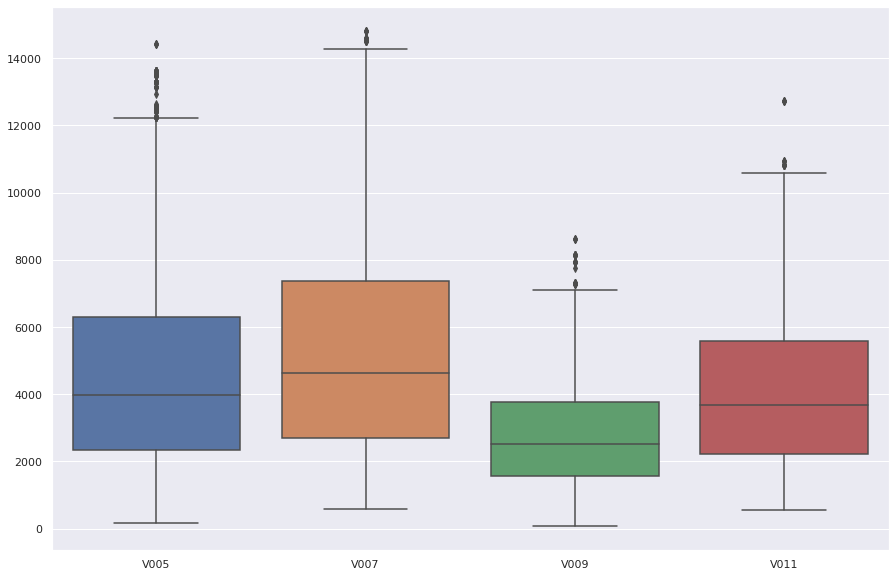

In [28]:
# Imprimindo box-plots de dados numéricos - Grupo 4
fig, ax = plt.subplots( figsize=(15, 10) )
ax = sns.boxplot( data=dados_vendas_censo_tratado[grupo4] )

plt.show()

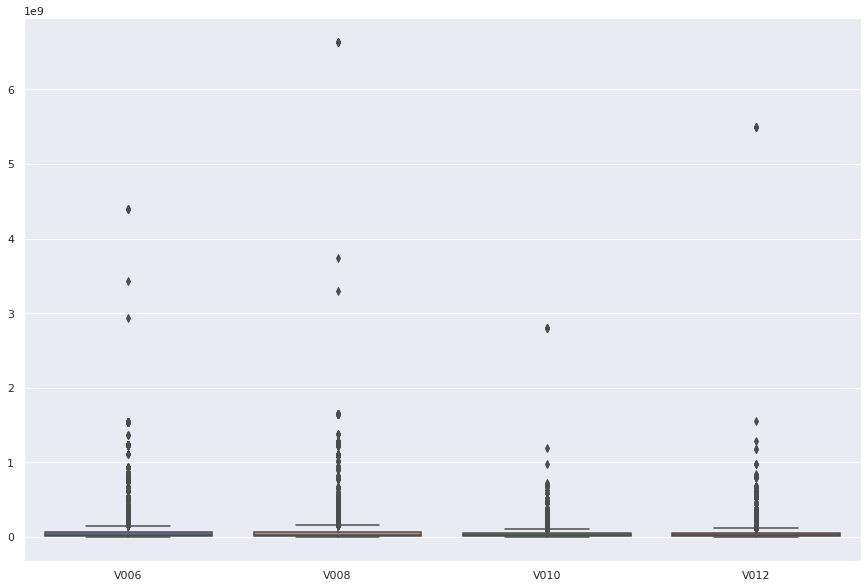

In [29]:
# Imprimindo box-plots de dados numéricos - Grupo 5
fig, ax = plt.subplots( figsize=(15, 10) )
ax = sns.boxplot( data=dados_vendas_censo_tratado[grupo5] )

plt.show()

In [30]:
grupo5_outliers = dados_vendas_censo_tratado[(dados_vendas_censo_tratado['V006'] >= 6e7) | \
    (dados_vendas_censo_tratado['V008'] >= 6.2e7) | \
        (dados_vendas_censo_tratado['V010'] > 4e7) | (dados_vendas_censo_tratado['V012'] >= 5e7)]
grupo5_outliers.shape

(1231, 50)

In [31]:
# Removendo outliers do conjunto de variáveis numéricas do grupo5
dados_vendas_censo_tratado = dados_vendas_censo_tratado.drop( labels=grupo5_outliers.index )
dados_vendas_censo_tratado.shape

(2921, 50)

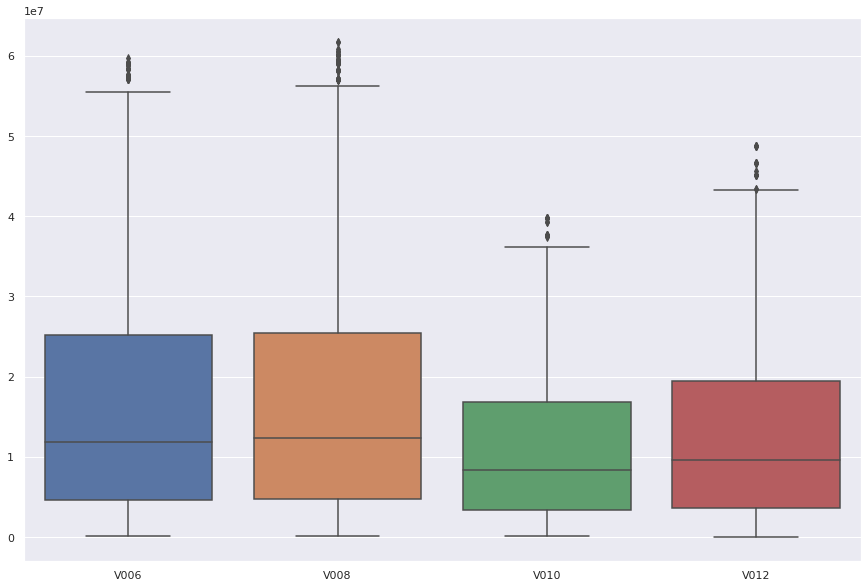

In [32]:
# Imprimindo box-plots de dados numéricos tratados - Grupo 5
fig, ax = plt.subplots( figsize=(15, 10) )
ax = sns.boxplot( data=dados_vendas_censo_tratado[grupo5] )

plt.show()

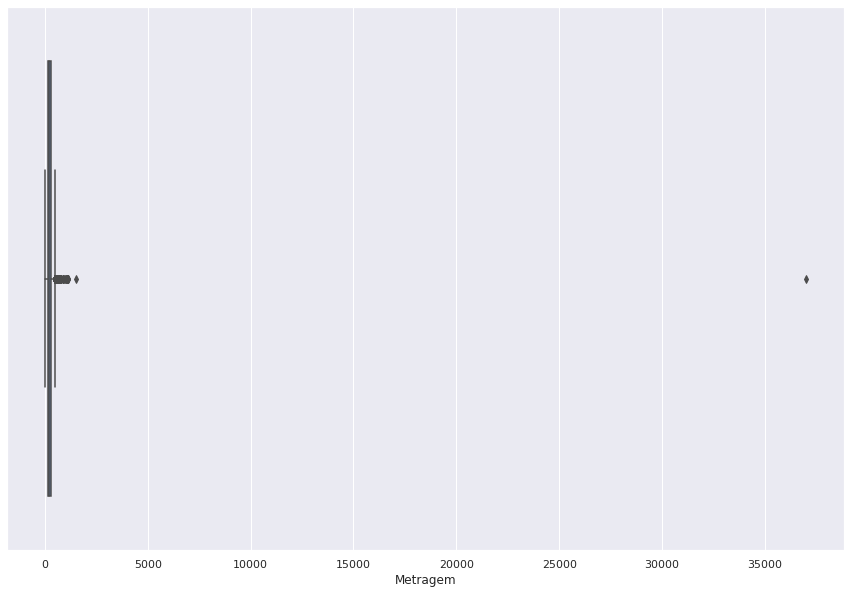

In [33]:
# Imprimindo box-plots de dados numéricos - Valor_m2
fig, ax = plt.subplots( figsize=(15, 10) )
ax = sns.boxplot( data=dados_vendas_censo_tratado, x='Metragem' )

plt.show()

In [34]:
outliers_Metragem = dados_vendas_censo_tratado[(dados_vendas_censo_tratado['Metragem'] >= 450)]
outliers_Metragem.shape

(185, 50)

In [35]:
# Removendo outliers do conjunto de variáveis numéricas do grupo3
dados_vendas_censo_tratado = dados_vendas_censo_tratado.drop( labels=outliers_Metragem.index )
dados_vendas_censo_tratado.shape

(2736, 50)

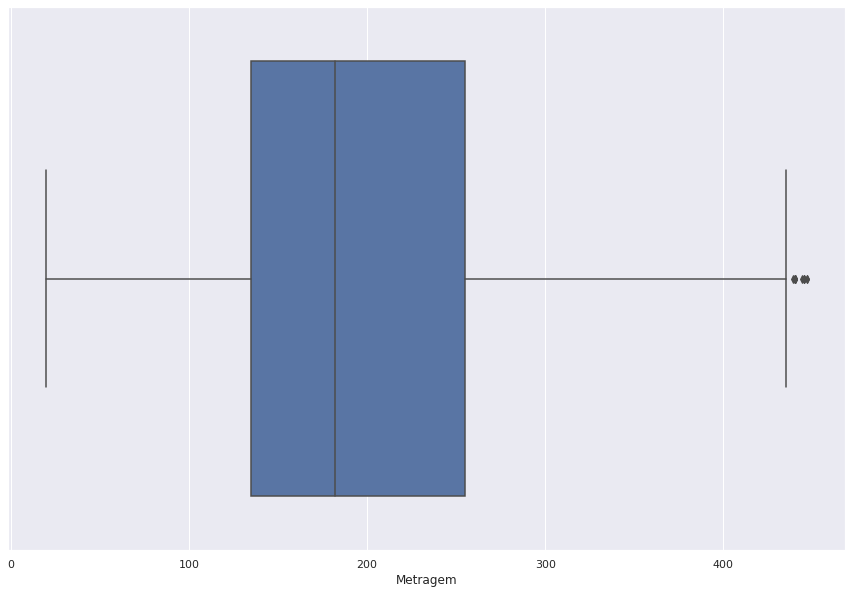

In [36]:
# Imprimindo box-plots de dados numéricos tratados - Valor_m2
fig, ax = plt.subplots( figsize=(15, 10) )
ax = sns.boxplot( data=dados_vendas_censo_tratado, x='Metragem' )

plt.show()

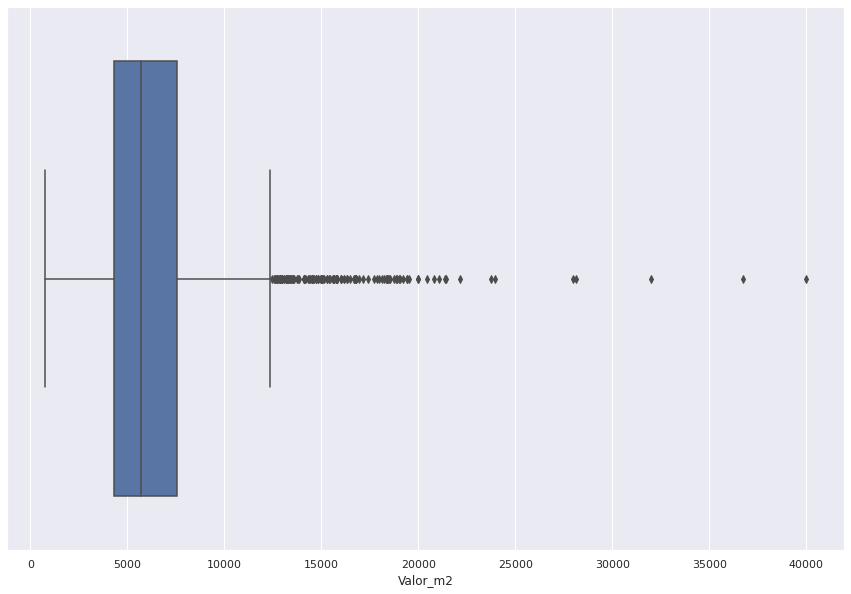

In [37]:
# Imprimindo box-plots de dados numéricos - Valor_m2
fig, ax = plt.subplots( figsize=(15, 10) )
ax = sns.boxplot( data=dados_vendas_censo_tratado, x='Valor_m2' )

plt.show()

In [38]:
outliers_Valor_m2 = dados_vendas_censo_tratado[(dados_vendas_censo_tratado['Valor_m2'] >= 12000)]
outliers_Valor_m2.shape

(153, 50)

In [39]:
# Removendo outliers do conjunto de variáveis numéricas do grupo3
dados_vendas_censo_tratado = dados_vendas_censo_tratado.drop( labels=outliers_Valor_m2.index )
dados_vendas_censo_tratado.shape

(2583, 50)

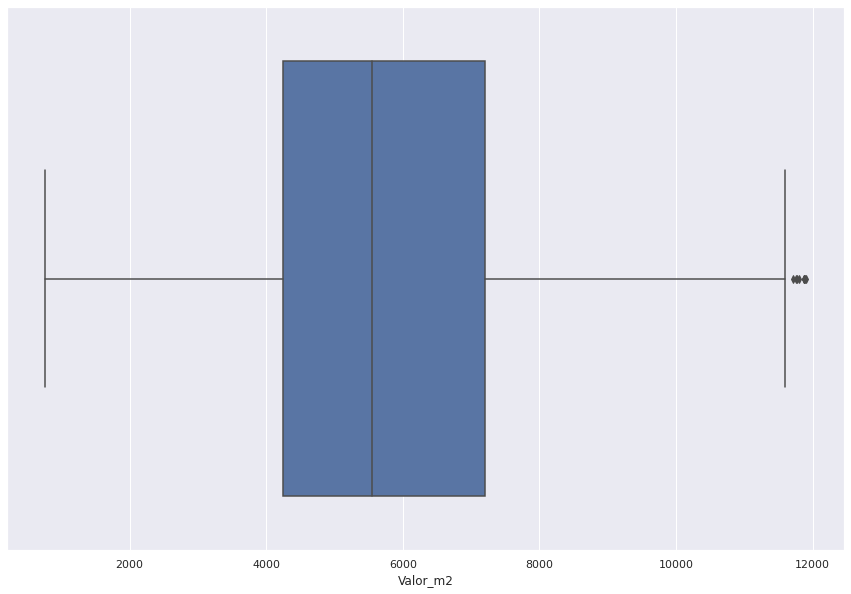

In [40]:
# Imprimindo box-plots de dados numéricos tratados - Valor_m2
fig, ax = plt.subplots( figsize=(15, 10) )
ax = sns.boxplot( data=dados_vendas_censo_tratado, x='Valor_m2' )

plt.show()

In [45]:
dados_vendas_censo_tratado.shape

(2583, 50)

In [46]:
dados_vendas_censo_tratado.to_csv( '../assets/dados_vendas_censo_tratado.csv' )

## [DESAFIO 3] Agrupar por mais de uma categoria e realizar as análises.

In [41]:
dados_vendas_censo_tratado.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Valor_mm,Valor_m2,rua,cep,latitude,longitude,Point,setor_censo,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,Nome_da_RM,Cod_municipio,Nome_do_municipio,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Nome_do_subdistrito,Cod_bairro,Nome_do_bairro,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.00,0.38,3040.00,Rua Alba Valdez,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050.00,355030830000050.00,3.00,Regiï¿½o Sudeste,35.00,Sï¿½o Paulo,3515.00,Metropolitana de Sï¿½o Paulo,35061.00,Sï¿½o Paulo,20.00,RM Sï¿½o Paulo,3550308.00,Sï¿½O PAULO,355030830.00,GRAJAï¿½,35503083000.00,GRAJAï¿½,3550308000.00,Sï¿½O PAULO (todos os setores),1.00,0.00,142.00,493.00,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.00,0.54,5400.00,Rua Tobias Barreto,3176000.00,-23.55,-46.59,POINT (-46.5881729 -23.5499597),355030808000050.00,355030808000050.00,3.00,Regiï¿½o Sudeste,35.00,Sï¿½o Paulo,3515.00,Metropolitana de Sï¿½o Paulo,35061.00,Sï¿½o Paulo,20.00,RM Sï¿½o Paulo,3550308.00,Sï¿½O PAULO,355030808.00,BELï¿½M,35503080800.00,BELï¿½M,3550308000.00,Sï¿½O PAULO (todos os setores),1.00,0.00,156.00,468.00,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.00,1.98,4500.00,Rua Graham Bell,4737030.00,-23.59,-46.76,POINT (-46.7600773 -23.5937964),355030865000169.00,355030865000169.00,3.00,Regiï¿½o Sudeste,35.00,Sï¿½o Paulo,3515.00,Metropolitana de Sï¿½o Paulo,35061.00,Sï¿½o Paulo,20.00,RM Sï¿½o Paulo,3550308.00,Sï¿½O PAULO,355030865.00,RAPOSO TAVARES,35503086500.00,RAPOSO TAVARES,3550308000.00,Sï¿½O PAULO (todos os setores),1.00,0.00,107.00,376.00,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
5,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,R$ 850.000,850000.00,0.85,5862.07,Rua Francisco Paulo,3306050.00,-23.52,-46.52,POINT (-46.5164525 -23.5222541),355030859000013.00,355030859000013.00,3.00,Regiï¿½o Sudeste,35.00,Sï¿½o Paulo,3515.00,Metropolitana de Sï¿½o Paulo,35061.00,Sï¿½o Paulo,20.00,RM Sï¿½o Paulo,3550308.00,Sï¿½O PAULO,355030859.00,PENHA,35503085900.00,PENHA,3550308000.00,Sï¿½O PAULO (todos os setores),1.00,0.00,222.00,654.00,2.95,2.18,1580.84,4440789.58,1897.01,4730743.23,1284.45,2578384.56,1743.39,2699812.75
6,"Rua Guilherme Valente, 150",Jardim Vergueiro,São Paulo,150,2,2,2,R$ 450.000,450000.00,0.45,3000.00,Rua Guilherme Valente,5818280.00,-23.66,-46.73,POINT (-46.7339399 -23.6647336),355030846000047.00,355030846000047.00,3.00,Regiï¿½o Sudeste,35.00,Sï¿½o Paulo,3515.00,Metropolitana de Sï¿½o Paulo,35061.00,Sï¿½o Paulo,20.00,RM Sï¿½o Paulo,3550308.00,Sï¿½O PAULO,355030846.00,JARDIM Sï¿½O LUï¿½S,35503084600.00,JARDIM Sï¿½O LUï¿½S,3550308000.00,Sï¿½O PAULO (todos os setores),1.00,0.00,305.00,984.00,3.23,2.13,1613.93,33332390.49,1721.15,35369361.97,880.61,12700171.03,1333.63,18640212.36


In [42]:
agrupamento_bivariado = dados_vendas_censo_tratado.groupby( ['Metragem', 'Valor_anuncio'] )['V005'].agg('mean')
agrupamento_bivariado

Metragem  Valor_anuncio
36        190000.00       1116.38
          196000.00       1116.38
46        290000.00       1285.20
48        199900.00       1692.15
50        200000.00       1627.47
                            ...  
445       1970000.00      1026.36
          1980000.00      1026.36
          3000000.00      4759.61
447       3999000.00      7823.49
          4000000.00      7823.49
Name: V005, Length: 2204, dtype: float64

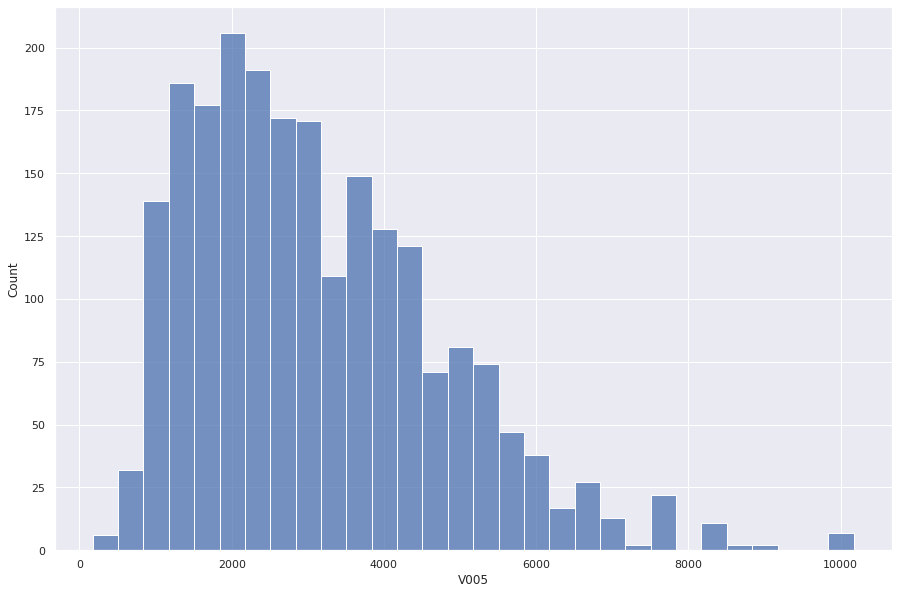

In [43]:
fig, ax = plt.subplots( figsize=(15, 10) )

ax = sns.histplot( agrupamento_bivariado )

plt.show()

## [DESAFIO 4] Organize o colab para deixar com cara de projeto e fazer comentários no código.

In [44]:
print( "Feito!!!" )

Feito!!!
